Week 3
live image analysis on incoming data from camera
using OpenCV and scikit-image

In [1]:
from skimage import color, io, measure, img_as_ubyte, exposure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage import color

In [2]:
%matplotlib inline

C:/Users/Jacob/OneDrive/Dokumenter/6. sem/Image Analysis/Excersises/W3_data/vertebra.png


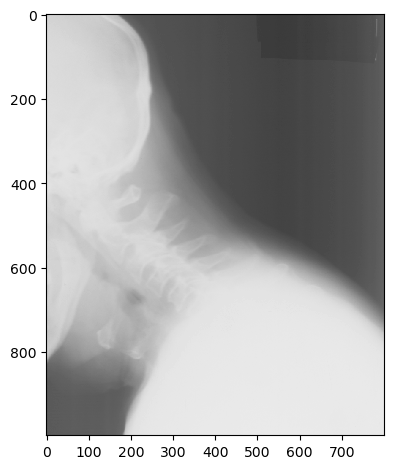

In [3]:
in_dir = "C:/Users/Jacob/OneDrive/Dokumenter/6. sem/Image Analysis/Excersises/W3_data/"
# X-ray image
im_name = "vertebra.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
print(in_dir + im_name)

im_org = io.imread(in_dir + im_name)
io.imshow(im_org)

Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [4]:
print(f"minimum: {im_org.min()}")
print(f"maximum: {im_org.max()}")

minimum: 57
maximum: 235


the image can definetely be enhanced by using the full gray scale, which is done by adding contrast

Use img_as_float to compute a new float version of your input image. Compute the minimum and maximum values of this float image. Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?

In [5]:
image_float = img_as_float(im_org)
print(f"minimum: {image_float.min()}")
print(f"compared to: {57/255}")
print(f"maximum: {image_float.max()}")
print(f"compared to: {235/255}")


minimum: 0.22352941176470587
compared to: 0.2235294117647059
maximum: 0.9215686274509803
compared to: 0.9215686274509803


Yes the float value is equal to the ubyte value divided by 255


Use img_as_ubyte on the float image you computed in the previous exercise. Compute the Compute the minimum and maximum values of this image. Are they as expected?

In [6]:
image_ubyte = img_as_ubyte(image_float)
print(f"minimum: {image_ubyte.min()}")
print(f"compared to: {0.22352941176470587*255}")
print(f"maximum: {image_ubyte.max()}")
print(f"compared to: {0.9215686274509803*255}")

minimum: 57
compared to: 56.99999999999999
maximum: 235
compared to: 235.0


Yes the result is as expected. There is a slight loss of info doing it since float is limited to a certain decimal, but doesnt really matter.

HISTOGRAM STRETCHING

You should implement a function, that automatically stretches the histogram of an image. In other words, the function should create a new image, where the pixel values are changed so the histogram of the output image is optimal. Here optimal means, that the minimum value is 0 and the maximum value is 255. It should be based on the linear histogram stretching equation:

 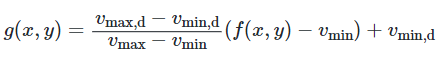

Here f(x,y) is the input pixel value and g(x,y) is the output pixel value, v_maxd and v_mind are the desired minimum and maximum values (0 and 255) and v_min and v_max are the current minumum and maximum values.

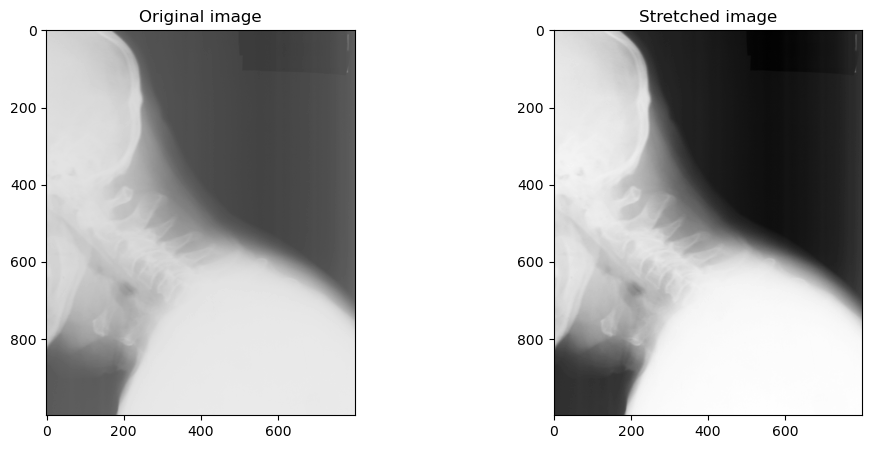

In [7]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = ((img_float-min_val)*(max_desired-min_desired)/(max_val-min_val))+min_desired
    
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

im_stretched = histogram_stretch(im_org)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_stretched, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Stretched image')
plt.show()

The goal is to implement and test a function that performs a -mapping of pixel values:

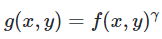

You can use the Numpy function power to compute the actual mapping function.

In [8]:
def gamma_map(img, gamma):
    im_float = img_as_float(img)
    im_floatgamma = np.power(im_float, gamma)
    im_gamma = img_as_ubyte(im_floatgamma)
    return im_gamma

Test your gamma_map function on the vertebra image or another image of your choice. Try different values of , for example 0.5 and 2.0. Show the resuling image together with the input image. Can you see the differences in the images?

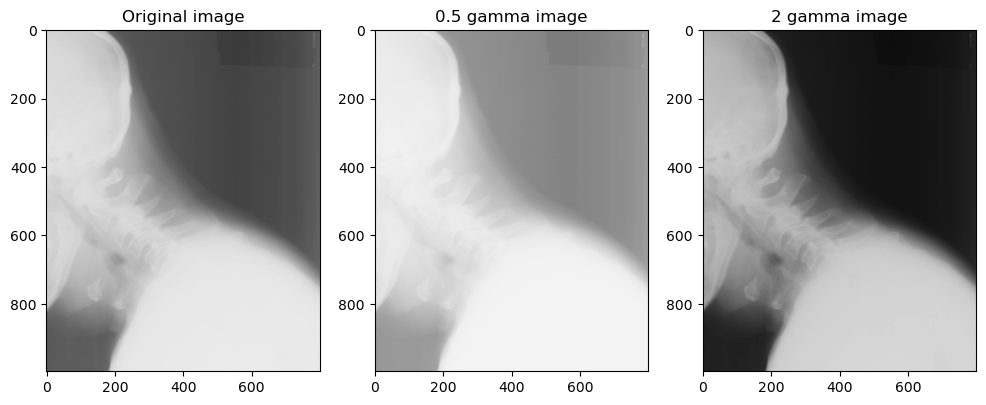

In [9]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(gamma_map(im_org, 0.5), cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('0.5 gamma image')
ax[2].imshow(gamma_map(im_org, 2), cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('2 gamma image')
plt.show()

IMAGE SEGMENTATION BY THRESHOLDING

implement a method "threshold"

In [10]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    image_mask = img_in > thres;
    return img_as_ubyte(image_mask)

Find a threshold where you can seperate the person from the background

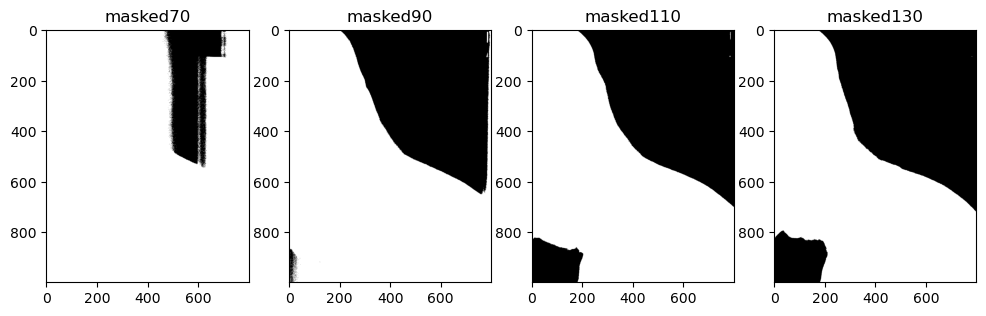

In [11]:
masked70 = threshold_image(im_org, 70)
masked90 = threshold_image(im_org, 90)
masked110 = threshold_image(im_org, 110)
masked130 = threshold_image(im_org, 130)
fig, ax = plt.subplots(nrows=1, ncols = 4, figsize = (12, 5))
ax[0].imshow(masked70, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('masked70')
ax[1].imshow(masked90, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('masked90')
ax[2].imshow(masked110, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('masked110')
ax[3].imshow(masked130, cmap = 'gray', vmin = 0, vmax = 255)
ax[3].set_title('masked130')
plt.show()

setting the threshold to 110 seems good
see the countour: 

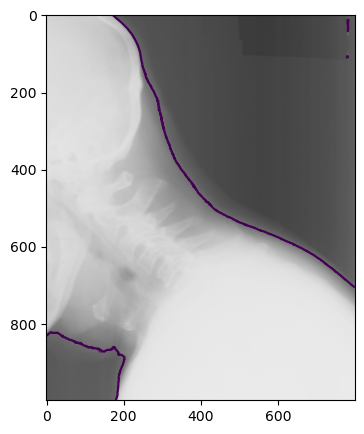

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
ax.imshow(im_org, cmap = 'gray', vmin=0, vmax = 255)
ax.contour(masked110, [254,256])
plt.show()

Automatic thresholds using Otsu's method

An optimal threshold can be estimated using Otsu's method. This method finds the threshold, that minimizes the combined variance of the foreground and background.

How does the threshold and the result compare to your manually found threshold?

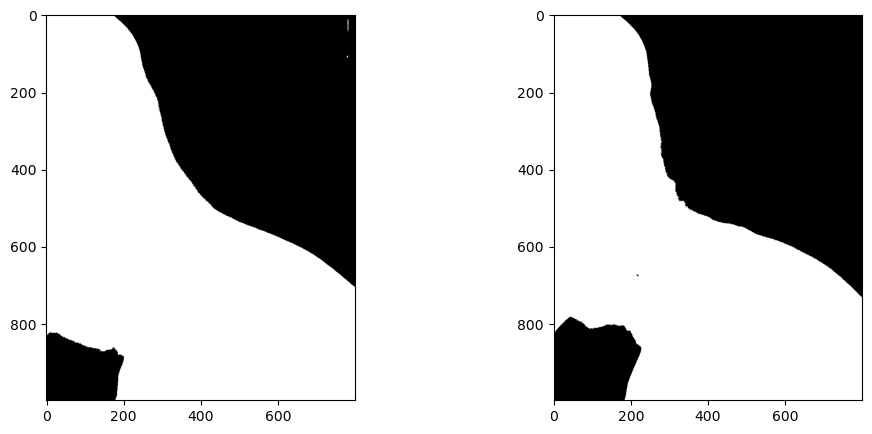

In [13]:
thresh_by_otsu = threshold_otsu(im_org)
im_otsuMask = threshold_image(im_org, thresh_by_otsu)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))
ax[0].imshow(masked110, cmap = 'gray', vmin=0, vmax = 255)
ax[1].imshow(im_otsuMask, cmap = 'gray', vmin=0, vmax = 255)
plt.show()

Exercicse 12

Use your camera to take some pictures of yourself or a friend. Try to take a picture on a dark background. Convert the image to grayscale and try to find a threshold that creates a silhouette image (an image where the head is all white and the background black). Alternatively, you can use the supplied photo dark_background.png found in the exercise data.

thresh_otsu: 58


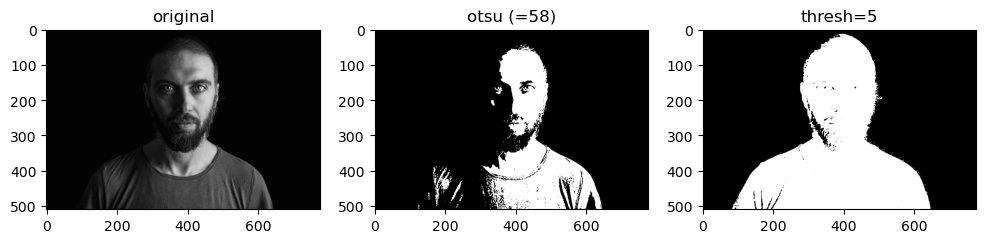

In [14]:
im_name = "dark_background.png"
im_org = io.imread(in_dir + im_name)
im_gray = img_as_ubyte(rgb2gray(im_org))

thresh_otsu = threshold_otsu(im_gray)
print(f"thresh_otsu: {thresh_otsu}")
im_masked_o = threshold_image(im_gray, thresh_otsu)
im_masked_manual = threshold_image(im_gray, 5)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,12))
ax[0].imshow(im_gray, cmap = 'gray', vmin=0, vmax = 255)
ax[0].set_title("original")
ax[1].imshow(im_masked_o, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("otsu (=58)")
ax[2].imshow(im_masked_manual, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title("thresh=5")
plt.show()

Color thresholding in the RGB color space

In the following, we will make a simple system for road-sign detection. Start by reading the image DTUSigns2.jpg found in the exercise data. We want to make a system that do a segmentation of the image - meaning that a new binary image is created, where the foreground pixels correspond to the sign we want to detect.

We do that by tresholding the colour-channels individually. This code segments out the blue sign:

In [15]:
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)

Exercise 13

Create a function detect_dtu_signs that takes as input a color image and returns an image, where the blue sign is identified by foreground pixels.

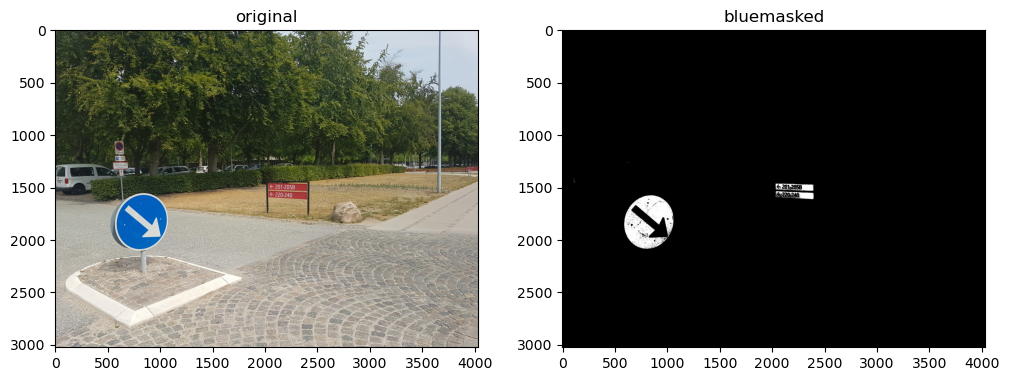

In [39]:
# read image
im_org = io.imread(in_dir + "DTUSigns2.jpg")
def  detect_dtu_signs (image, color):
    r_comp = image[:, :, 0]
    g_comp = image[:, :, 1]
    b_comp = image[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    segm_red = (r_comp < 200) & (r_comp > 140) & \
                (g_comp > 45) & (g_comp < 65) & \
                (b_comp > 50) & (b_comp < 65)
    return img_as_ubyte(segm_blue) if color == "blue" else img_as_ubyte(segm_red)
#mask
im_bluemask = detect_dtu_signs(im_org, "blue")

#show
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,12))
ax[0].imshow(im_org)
ax[0].set_title("original")
ax[1].imshow(im_bluemask, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("bluemasked")
plt.show()

Exercise 14

Extend your detect_dtu_signs function so it can also detect red signs. You can add an argument to the function, that tells which color it should look for. You should use one of the explorative image tools to find out what the typical RGB values are in the red signs.

BRUG "PHOTOSCAPE X" SOM TOOL

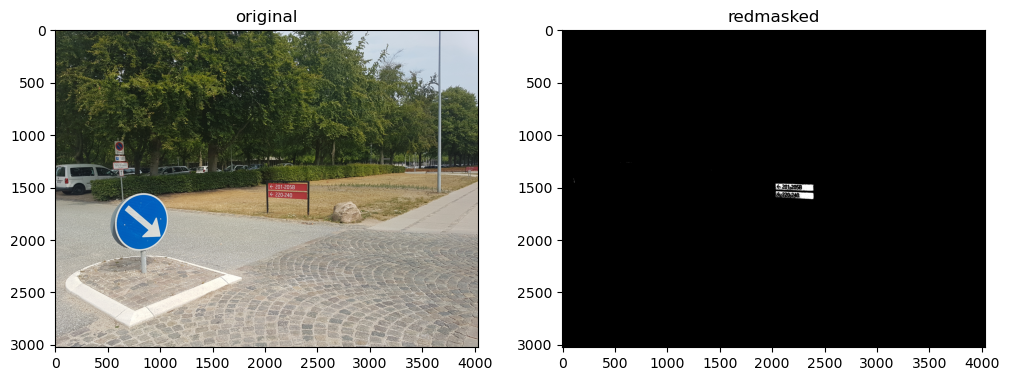

In [17]:
#mask
im_redmask = detect_dtu_signs(im_org, "red")
#show
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,12))
ax[0].imshow(im_org)
ax[0].set_title("original")
ax[1].imshow(im_redmask, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("redmasked")
plt.show()

Color thresholding in the HSV color space

Sometimes it gives better segmentation results when the tresholding is done in HSI (also known as HSV - hue, saturation, value) space. Start by reading the DTUSigns2.jpg image, convert it to HSV and show the hue and value (from here):

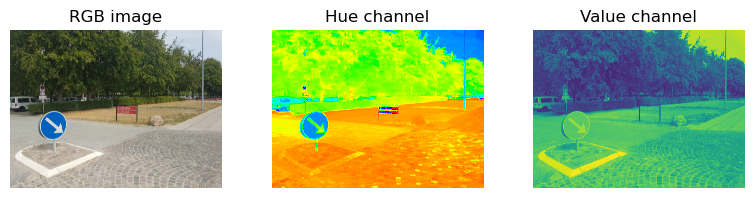

In [18]:
    hsv_img = color.rgb2hsv(im_org)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
    ax0.imshow(im_org)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel")
    ax1.axis('off')
    ax2.imshow(value_img)
    ax2.set_title("Value channel")
    ax2.axis('off')

    fig.tight_layout()
    io.show()

Exercise 15

Now make a sign segmentation function using tresholding in HSV space and locate both the blue and the red sign.

In [19]:
print(hue_img.max())
print(355/360)

0.9986111111111111
0.9861111111111112


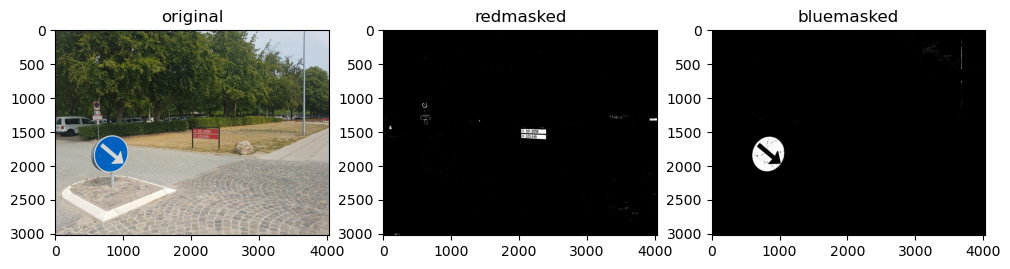

In [40]:
def detect_dtu_signs_hsv(image, color):
    hue = image[:, :, 0]
    value = image[:, :, 2]
    segm_blue = (hue > 205/360) & (hue < 212/360) & (value > 252/360) & (value < 277/360)
    segm_red = (hue > 355/360) | (hue < 3/360) #TODO: add value also...

    return img_as_ubyte(segm_blue) if color == "blue" else img_as_ubyte(segm_red)
#mask
im_redmask = detect_dtu_signs_hsv(hsv_img, "red")
im_bluemask = detect_dtu_signs_hsv(hsv_img, "blue")
#show
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,12))
ax[0].imshow(im_org)
ax[0].set_title("original")
ax[1].imshow(im_redmask, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("redmasked")
ax[2].imshow(im_bluemask, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title("bluemasked")
plt.show()

Real time pixelwise operations on videos

In the exercise material, there is a Python script using OpenCV that:

-Connects to a camera

-Acquire images, converts them to gray-scale

-Do a simple processing on the gray-scale (inversion) or the colour image (inversion of the red channel)

-Computes the frames per second (fps) and shows it on an image.

-Shows input and resulting images in windows.

-Checks if the key q has been pressed and stops the program if it is pressed.

It is possible to use a mobile phone as a remote camera by following the instructions in exercise 2b.

Exercise 16

Run the program from the exercise material and see if it shows the expected results?

In [37]:
""" PROGRAM FOR OPENCV (given in exercises and changed) """
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2

"""NEW: map type"""
from enum import Enum
class processingType(Enum):
    NEGATIVE_GRAY = 1
    RGB = 2
    THRESHOLD = 3
    GAMMA = 4


def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    img_float = img_as_float(img)
    img_proc = 1 - img_float # this gives the image negative!
    return img_as_ubyte(img_proc)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp # this gives the red level image negative!
    # return proc_img
    
    """ NEW: REWRITE TO LOOK FOR DTU SIGNS! (both blue and red) """
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    g_comp = proc_img[:, :, 1]
    b_comp = proc_img[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    segm_red = (r_comp < 200) & (r_comp > 140) & \
                (g_comp > 45) & (g_comp < 65) & \
                (b_comp > 50) & (b_comp < 65)
    segm_both = segm_blue | segm_red
    return img_as_ubyte(segm_both)
    
    

""" NEW: gamma the shit"""
def process_gamma_image(img, x):
    proc_img = img.copy()
    img_float = img_as_float(img)
    img_gamma = np.power(img_float, x)
    return img_as_ubyte(img_gamma)

""" NEW: threshold the shit"""
def process_thres_image(img):
    thres = threshold_otsu(img)
    proc_img = img > thres
    return img_as_ubyte(proc_img)

def capture_from_camera_and_show_images():
    """ NEW: select processing type: """
    procType = processingType.RGB
    GAMMA = 3
    
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = True
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        
        
        if procType == processingType.GAMMA:
             proc_img = process_gamma_image(new_image_gray, GAMMA)
        elif procType == processingType.NEGATIVE_GRAY:
             proc_img = process_gray_image(new_image_gray)
        elif procType == processingType.RGB:
             proc_img = process_rgb_image(new_image)
             """
             # convert back to OpenCV BGR to show it
             proc_img = proc_img[:, :, ::-1]
             
             (NOT NEEDED ANYMORE, THIS SHIT BINARY!
             """
        elif procType == processingType.THRESHOLD:
            proc_img = process_thres_image(new_image_gray)
        else:
            print("no match in processing type !?")
       
        """ NEW: """ 
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(proc_img, procType.name, (100,100), font, 1, 255, 1)
        
        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Input gray', new_image_gray, 600, 10)
        show_in_moved_window('Processed image', proc_img, 1200, 10)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()


Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


Exercise 17

Change the gray-scale processing in the exercise material script to be for example thresholding, gamma mapping or something else. Do you get the visual result that you expected?


In [35]:
""" look above in opencv script """

' look above in opencv script '

Exercise 18: Real time detection of DTU signs

Change the rgb-scale processing in the exercise material script so it does a color threshold in either RGB or HSV space. The goal is to make a program that can see DTU street signs. The output should be a binary image, where the pixels of the sign is foreground. Later in the course, we will learn how to remove the noise pixels.

In [41]:
""" done a rewrite of the method, look above"""

' done a rewrite of the method, look above'